<h2> 1. Importing libraries </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

<h2> 2. Pre-Processing </h2>

In [2]:
df_dict = load_digits()
df_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X = df_dict['images'] 
y = df_dict['target']

print("Target =", y[0])
print("Pixel values =\n", X[0])

Target = 0
Pixel values =
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Target = 1


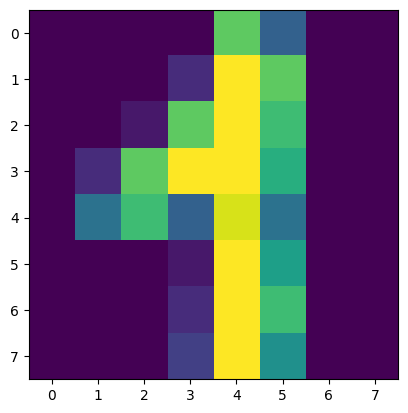

In [4]:
# Plotting a random image

plt.imshow(X[42])
print("Target =", y[42])
plt.show()

In [5]:
# We will use the flattened version of images array (1D version) to fit inside the model
X_flattened = df_dict["data"]

old_dim = X[0].shape

print(f"Size of image array before flatten: {old_dim[0]} * {old_dim[1]}")
print(f"Size of image array after flatten: {len(X_flattened[0])} * 1")

Size of image array before flatten: 8 * 8
Size of image array after flatten: 64 * 1


In [6]:
print("Number of images:", X.shape[0])

Number of images: 1797


In [7]:
# Normailizing pixel values [0, 1] to give a better model accuracy model

mx_val = X_flattened.max()
X_flattened = X_flattened / mx_val

print(X_flattened[0])

[0.     0.     0.3125 0.8125 0.5625 0.0625 0.     0.     0.     0.
 0.8125 0.9375 0.625  0.9375 0.3125 0.     0.     0.1875 0.9375 0.125
 0.     0.6875 0.5    0.     0.     0.25   0.75   0.     0.     0.5
 0.5    0.     0.     0.3125 0.5    0.     0.     0.5625 0.5    0.
 0.     0.25   0.6875 0.     0.0625 0.75   0.4375 0.     0.     0.125
 0.875  0.3125 0.625  0.75   0.     0.     0.     0.     0.375  0.8125
 0.625  0.     0.     0.    ]


<h2> 3. Model Training </h2>

In [8]:
model = KMeans(n_clusters = 10, random_state = 5)
model.fit(X_flattened)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=5)

In [9]:
y_pred = model.labels_
print("First five clusters:", y_pred[:5])

First five clusters: [6 0 0 2 3]


<h2> 4. Mapping clusters to their corresponding digit numbers </h2>

In [10]:
def most_common_digit(cluster):

    cluster_indices = np.where(y_pred == cluster)
    true_digits = y[cluster_indices]

    frequencies = np.bincount(true_digits)
    most_common = frequencies.argmax()

    return most_common

In [11]:
edits = []

for cluster in range(10):

    # Storing the most common digit in a cluster in the edits list
    
    most_common = most_common_digit(cluster)
    print(f"Cluster = {cluster}, Most Common Digit = {most_common}")
    
    edits.append(most_common)

Cluster = 0, Most Common Digit = 8
Cluster = 1, Most Common Digit = 6
Cluster = 2, Most Common Digit = 3
Cluster = 3, Most Common Digit = 4
Cluster = 4, Most Common Digit = 2
Cluster = 5, Most Common Digit = 9
Cluster = 6, Most Common Digit = 0
Cluster = 7, Most Common Digit = 7
Cluster = 8, Most Common Digit = 1
Cluster = 9, Most Common Digit = 5


In [12]:
# Cluster number -> most common digit found in it

y_pred = [edits[cluster] for cluster in y_pred]
y_pred = np.array(y_pred)

<h2> 5. Evaluating model's accuracy </h2>

In [13]:
for cluster in range(10):
    print(f"Cluster = {cluster}, Most Common Digit = {most_common_digit(cluster)}")

Cluster = 0, Most Common Digit = 0
Cluster = 1, Most Common Digit = 1
Cluster = 2, Most Common Digit = 2
Cluster = 3, Most Common Digit = 3
Cluster = 4, Most Common Digit = 4
Cluster = 5, Most Common Digit = 5
Cluster = 6, Most Common Digit = 6
Cluster = 7, Most Common Digit = 7
Cluster = 8, Most Common Digit = 8
Cluster = 9, Most Common Digit = 9


In [14]:
accuracy = round(accuracy_score(y, y_pred) * 100, 2)
print(f"Accuracy = {accuracy}%")

Accuracy = 79.13%


<h2> 6. Plotting the results </h2>

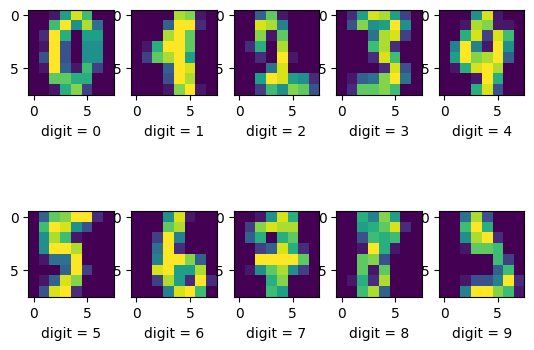

In [15]:
for cluster in range(10):

    plt.subplot(2, 5, cluster + 1)
    plt.xlabel(f"digit = {y_pred[cluster + 10]}")
    plt.imshow(X[cluster + 10])

plt.show()